In [22]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [1]:
import sys
sys.path.append('../drlfoil/')

In [1]:
import gymnasium as gym
import drlfoil
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [14]:
env = gym.make('AirfoilEnv-v0', n_params=8, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(8), -0.1*np.ones(8), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.4, efficiency_param = 1, cl_wide = 20, render_mode="human",
                    n_boxes=1,
                    reynolds = 2e7)
model = PPO.load("logmodels/130524/130524_3.5M_OneBox_Seed0.1_ReMin1e5_ReMax5e7_CLmax1.6/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [3]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

c:\Users\pablomaga\Documents\GitHub\DRLFoil\venv\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:579.87 +/- 255.06


In [15]:
# Enjoy trained agent
vec_env = model.get_env()
obs, _ = env.reset()

Step: 0, Action: [ 0.92110896  1.          1.          1.          1.          1.
  1.          1.         -1.         -0.41288334 -0.03788063 -1.
  1.         -1.         -1.         -1.          1.        ], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.23816635  0.25        0.25        0.25        0.25        0.25
  0.25        0.25       -0.25       -0.1619325  -0.1056821  -0.25
  0.05       -0.25       -0.25       -0.25        0.15      ]


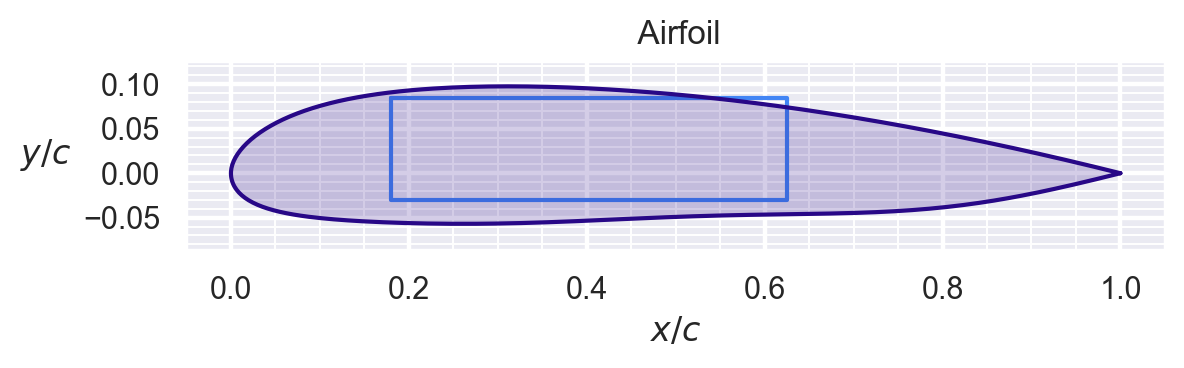

Step: 1, Action: [ 0.47498384  0.38146138  1.          1.          1.          1.
  1.          1.         -1.          1.         -0.00619131 -1.
  1.         -1.         -1.         -0.8043173   0.88392043], Reward: 60.436237977078875, Done: False, Info: {'step': 2, 'efficiency': 61.87960424651891, 'cl': 0.43435239339887266}
Obs: [ 0.30941394  0.3072192   0.4         0.4         0.4         0.4
  0.4         0.4        -0.4        -0.0119325  -0.10661079 -0.4
  0.20000002 -0.4        -0.4        -0.3706476   0.28258806]


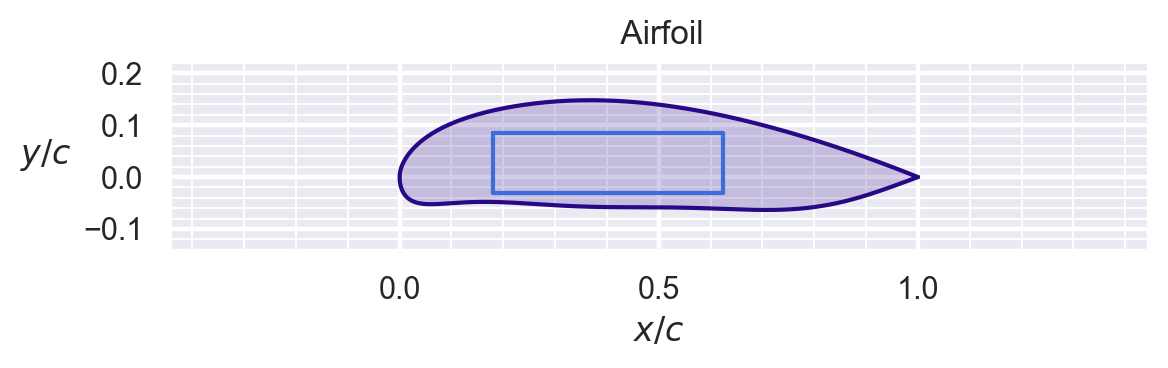

Step: 2, Action: [ 0.13765654 -0.58732057  1.          0.85961235  0.436944    1.
 -0.22475222  0.450379   -1.          1.         -0.6005119  -1.
  1.          0.52895916  0.07988952  0.40567553 -0.07377654], Reward: 72.47133447127588, Done: False, Info: {'step': 3, 'efficiency': 78.33989615901753, 'cl': 0.46239627619033374}
Obs: [ 0.33006242  0.21912113  0.55        0.52894187  0.4655416   0.55
  0.36628717  0.46755686 -0.55        0.13806751 -0.19668758 -0.55
  0.35000002 -0.32065612 -0.38801658 -0.30979627  0.2715216 ]


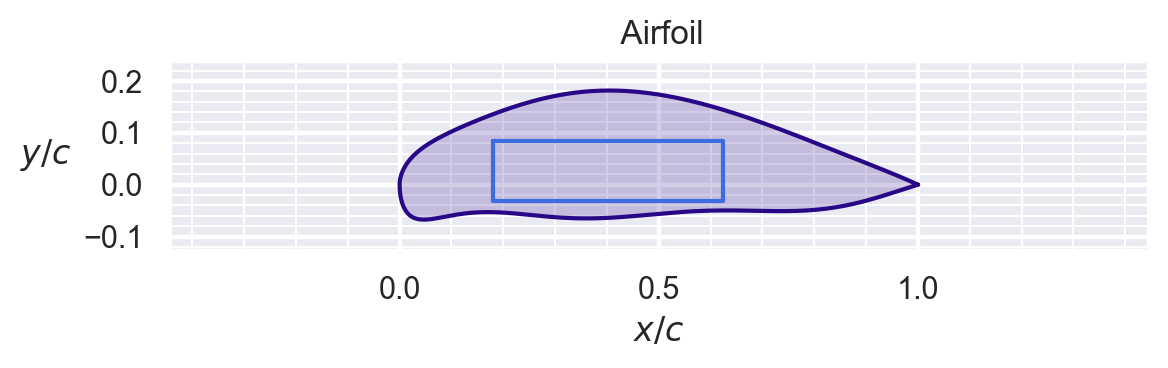

Step: 3, Action: [-0.26307133  0.3388862  -0.32160673 -0.45938286  0.36434257 -0.53800976
  0.01745036 -0.05418832 -0.06454248 -0.24229716 -0.4614545   0.46967164
 -0.8389196  -0.79657847  0.5254926   0.15970531  0.03238415], Reward: 73.16594648648261, Done: False, Info: {'step': 4, 'efficiency': 73.60993240401832, 'cl': 0.4173923359299053}
Obs: [ 0.2906017   0.26995406  0.501759    0.46003443  0.520193    0.46929854
  0.36890474  0.4594286  -0.5596814   0.10172293 -0.26590577 -0.47954926
  0.22416209 -0.4401429  -0.3091927  -0.28584048  0.27637923]


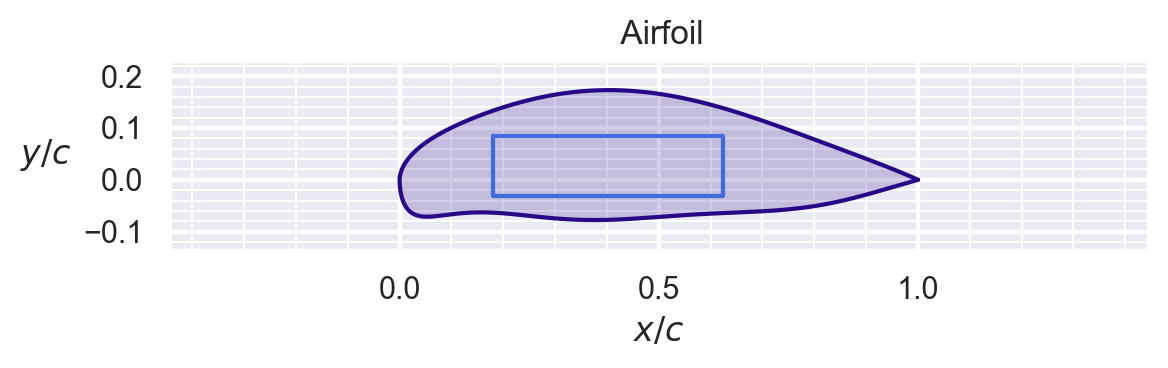

Step: 4, Action: [ 0.11608583 -0.2912125   0.5777656   0.13662001  0.22670023  0.6841226
 -0.58910495  0.2478331  -0.08889799  0.19543773 -0.098155   -0.54367507
  0.3050067   0.30998412  0.1288539  -0.08777949  0.3003971 ], Reward: 75.40139314753573, Done: False, Info: {'step': 5, 'efficiency': 76.27570221336407, 'cl': 0.424009045479249}
Obs: [ 0.3080146   0.22627218  0.58842385  0.48052746  0.554198    0.57191694
  0.28053898  0.49660358 -0.5730161   0.13103859 -0.280629   -0.56110054
  0.26991308 -0.3936453  -0.2898646  -0.29900742  0.3214388 ]


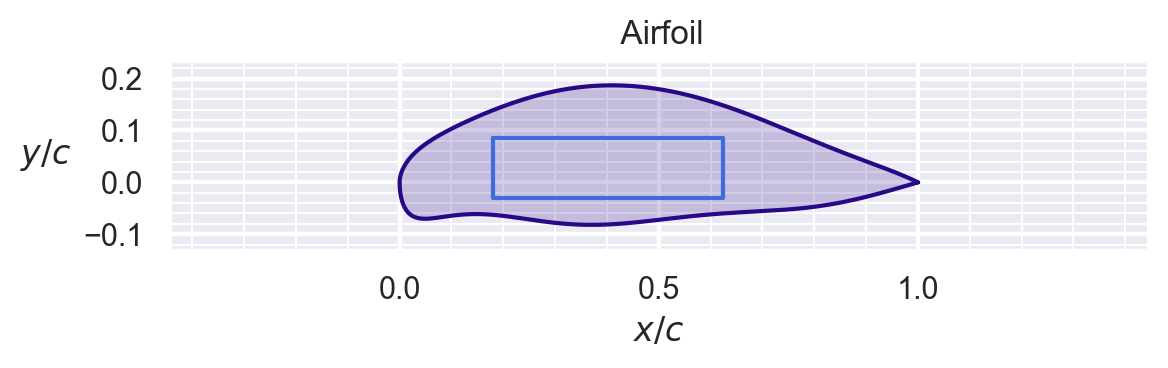

Step: 5, Action: [-0.05685887  0.25743496 -0.3277766  -0.2944478   0.07738437 -0.662907
 -0.16872647  0.15692902  0.3173533  -0.16513123  0.08950779  0.8629965
 -0.6498683  -0.15129569  0.24036501  0.10086497 -0.13391452], Reward: 79.03662779148942, Done: False, Info: {'step': 6, 'efficiency': 81.16250090929692, 'cl': 0.4364293433168389}
Obs: [ 0.29948574  0.26488742  0.53925735  0.43636027  0.5658057   0.4724809
  0.25523     0.5201429  -0.5254131   0.10626891 -0.26720285 -0.43165106
  0.17243284 -0.41633964 -0.25380984 -0.28387767  0.3013516 ]


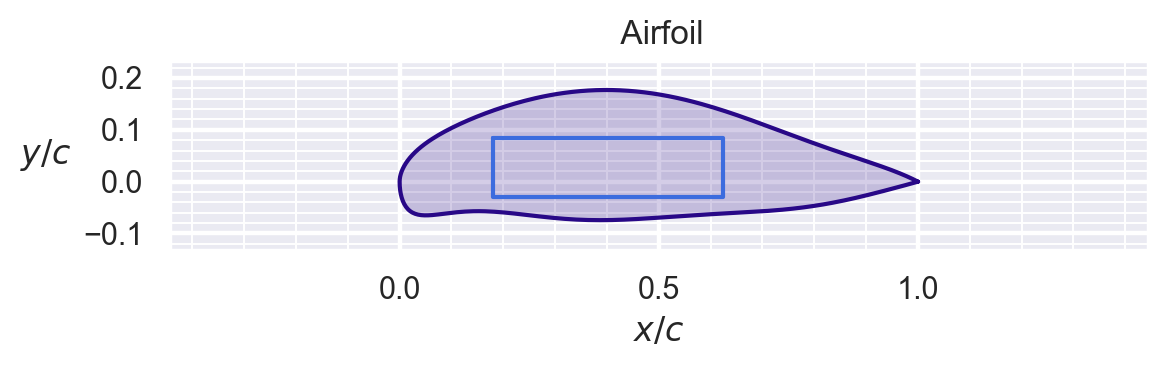

Step: 6, Action: [ 0.1486896  -0.24745995  0.38021323  0.07631384 -0.17344387  0.9373456
  0.07696125  0.19079301 -0.25575492  0.10948104 -0.04877815 -0.9097715
  0.5749261   0.2916455  -0.2075854  -0.3042235   0.17975762], Reward: 73.65990795444202, Done: False, Info: {'step': 7, 'efficiency': 74.00205663208519, 'cl': 0.41522206248772764}
Obs: [ 0.3217892   0.22776844  0.59628934  0.44780734  0.5397891   0.6130827
  0.2667742   0.5487619  -0.5637763   0.12269107 -0.27451956 -0.5681168
  0.25867176 -0.3725928  -0.28494766 -0.3295112   0.32831526]


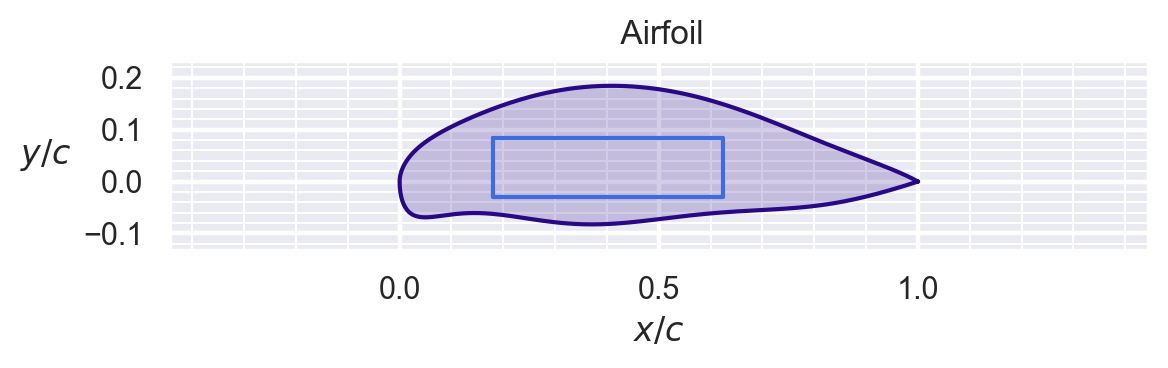

Step: 7, Action: [-0.03204485  0.2597598  -0.32455128 -0.17558129  0.18018001 -0.8802166
 -0.38801908 -0.14738852  0.13820177 -0.02174145  0.07572101  1.
 -0.80874103 -0.41548297  0.40228057  0.38717413 -0.31990033], Reward: 79.50557592124223, Done: False, Info: {'step': 8, 'efficiency': 81.6872651154813, 'cl': 0.43679059621830874}
Obs: [ 0.31698248  0.26673242  0.54760665  0.42147017  0.5668161   0.48105022
  0.20857133  0.5266536  -0.54304606  0.11942985 -0.26316142 -0.41811678
  0.13736059 -0.43491527 -0.22460558 -0.27143505  0.2803302 ]


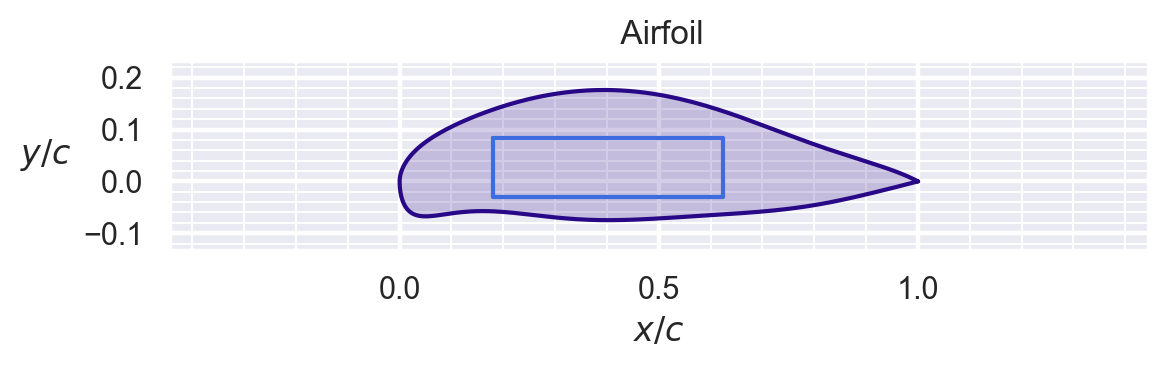

Step: 8, Action: [ 0.04372414 -0.2668867   0.32956734  0.10427438 -0.26075077  0.8686932
  0.26987448  0.24839762 -0.07352831 -0.02742319 -0.1602995  -0.8678491
  0.8731693   0.18707722 -0.35406357 -0.38620394  0.44913918], Reward: 73.88087553960165, Done: False, Info: {'step': 9, 'efficiency': 74.24308413427393, 'cl': 0.4156374938487051}
Obs: [ 0.3235411   0.2266994   0.5970417   0.43711132  0.5277035   0.61135423
  0.24905251  0.5639133  -0.5540753   0.11531637 -0.28720635 -0.5482941
  0.268336   -0.40685368 -0.27771512 -0.32936567  0.34770107]


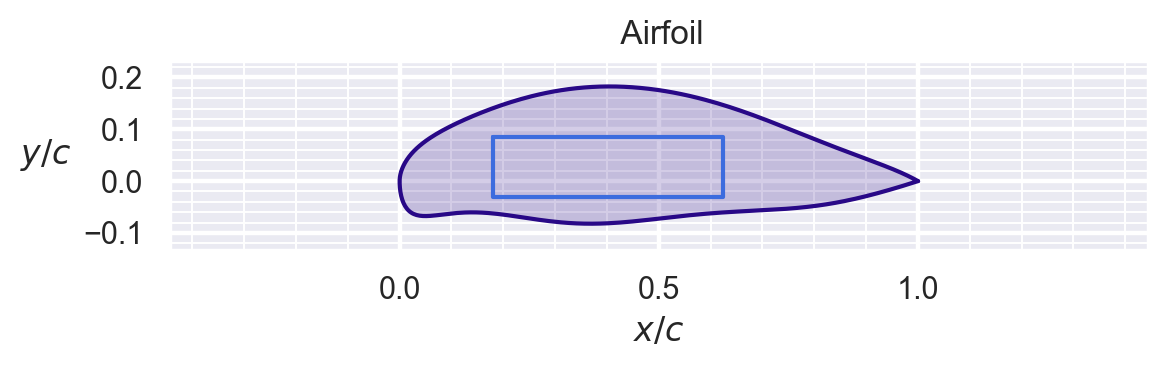

Step: 9, Action: [ 0.02551457  0.14455804 -0.19187063 -0.14980239  0.16163553 -0.51739645
 -0.40611422 -0.22168463  0.02762549  0.11123514  0.14808251  0.8208061
 -0.7034161  -0.17121992  0.4083811   0.41249704 -0.47047907], Reward: 80.29056085605875, Done: True, Info: {'step': 10, 'efficiency': 82.88011657680788, 'cl': 0.4398391262032103}
Obs: [ 0.3273683   0.2483831   0.56826115  0.41464096  0.55194885  0.53374475
  0.18813537  0.53066057 -0.54993147  0.13200164 -0.26499397 -0.42517322
  0.16282357 -0.43253666 -0.21645795 -0.2674911   0.2771292 ]


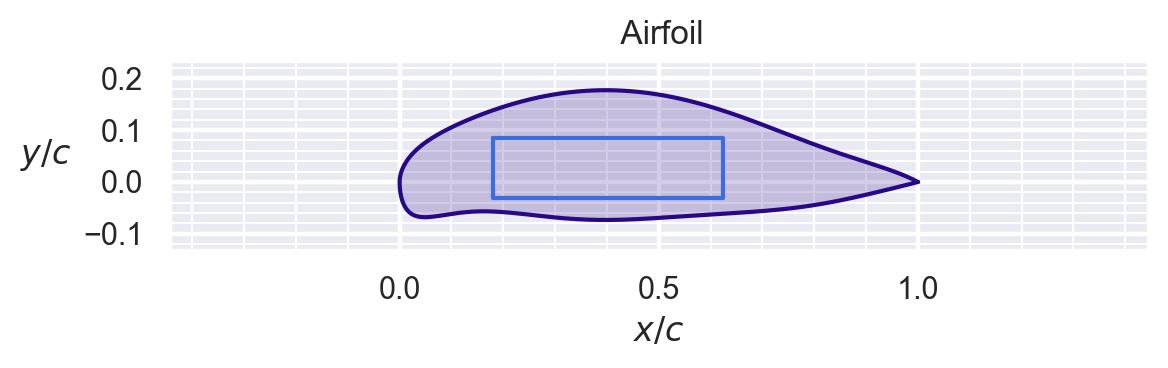

Step: 10, Action: [ 1.          1.          1.          1.          1.          1.
  1.          1.         -1.         -0.4560717   0.03398267 -1.
  1.         -1.         -1.         -1.          1.        ], Reward: -100, Done: False, Info: {'step': 1, 'efficiency': 0.0, 'cl': 0.0}
Obs: [ 0.25        0.25        0.25        0.25        0.25        0.25
  0.25        0.25       -0.25       -0.16841076 -0.0949026  -0.25
  0.05       -0.25       -0.25       -0.25        0.15      ]


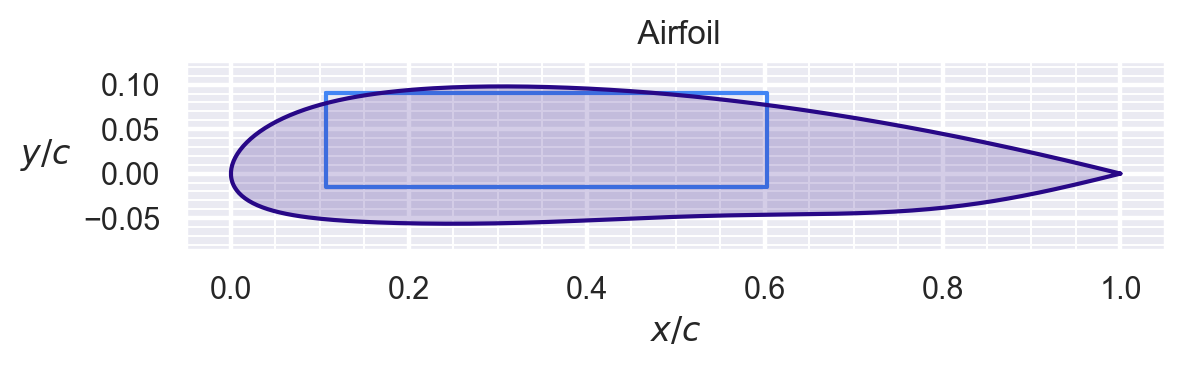

Step: 11, Action: [ 0.53246063  0.5010557   1.          1.          1.          1.
  1.          1.         -1.          1.          0.04364179 -1.
  1.         -1.         -1.         -0.8200996   1.        ], Reward: 57.18306601248325, Done: False, Info: {'step': 2, 'efficiency': 58.411415659962884, 'cl': 0.4325987258488253}
Obs: [ 0.3298691   0.32515836  0.4         0.4         0.4         0.4
  0.4         0.4        -0.4        -0.01841076 -0.08835633 -0.4
  0.20000002 -0.4        -0.4        -0.37301496  0.3       ]


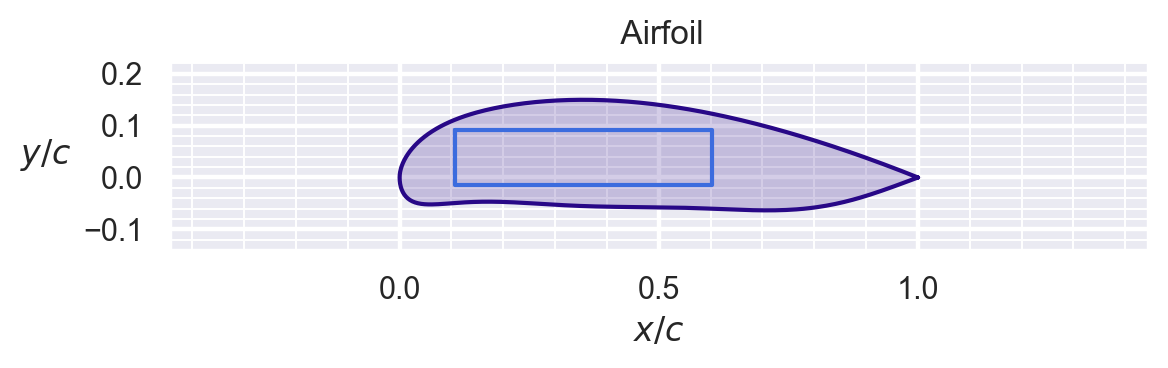

Step: 12, Action: [ 0.12237781 -0.58896804  1.          1.          0.42098415  1.
 -0.11186288  0.5595511  -1.          1.         -0.58007324 -1.
  1.          0.60339046  0.12571536  0.41503698 -0.07155888], Reward: 70.74531619479613, Done: False, Info: {'step': 3, 'efficiency': 79.43641526147388, 'cl': 0.47611522892077196}
Obs: [ 0.34822577  0.23681316  0.55        0.55        0.46314764  0.55
  0.38322058  0.48393267 -0.55        0.13158925 -0.17536731 -0.55
  0.35000002 -0.30949143 -0.3811427  -0.3107594   0.28926617]


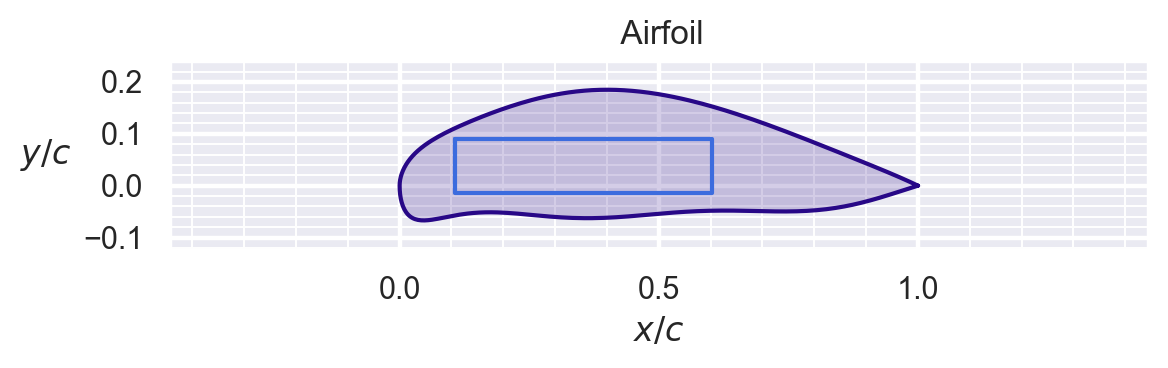

Step: 13, Action: [-0.25801387  0.35494924 -0.2717629  -0.4055924   0.36791587 -0.50800204
  0.0674101  -0.09302459 -0.19929156 -0.27405626 -0.46087474  0.40603784
 -0.5929773  -0.7643664   0.6034079   0.12629443  0.09821561], Reward: 72.16636752746585, Done: False, Info: {'step': 4, 'efficiency': 73.35952419050517, 'cl': 0.42863409534498476}
Obs: [ 0.3095237   0.29005554  0.50923556  0.48916116  0.51833504  0.4737997
  0.3933321   0.469979   -0.57989377  0.09048081 -0.24449852 -0.48909435
  0.2610534  -0.4241464  -0.29063153 -0.29181522  0.30399853]


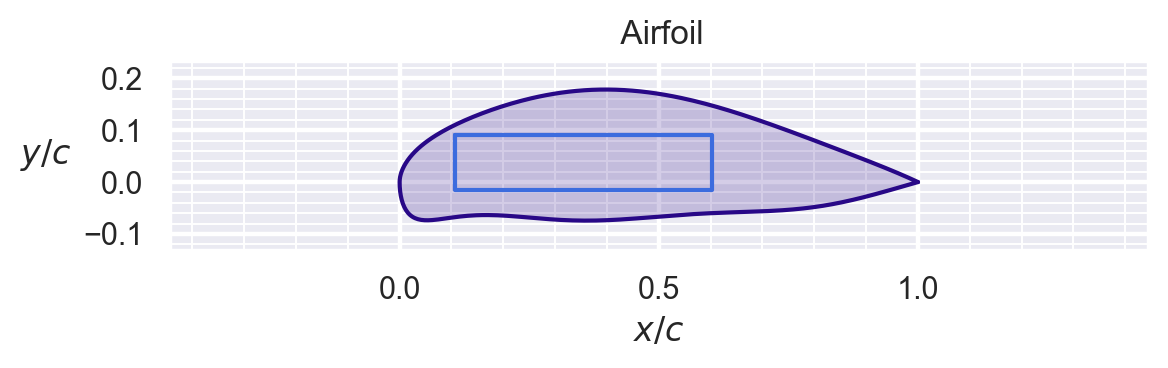

Step: 14, Action: [ 0.06395788 -0.33298695  0.6149555   0.05315693  0.26213026  0.56576174
 -0.58529264  0.16010347  0.00527606  0.2570655  -0.12665069 -0.38974392
  0.22454533  0.19928738  0.2889194  -0.05935806  0.21828356], Reward: 75.41454377547939, Done: False, Info: {'step': 5, 'efficiency': 77.71401267639379, 'cl': 0.43875270297470426}
Obs: [ 0.31911737  0.2401075   0.60147893  0.4971347   0.55765456  0.55866396
  0.30553818  0.4939945  -0.57910234  0.12904064 -0.26349613 -0.5475559
  0.29473522 -0.39425328 -0.2472936  -0.30071893  0.33674106]


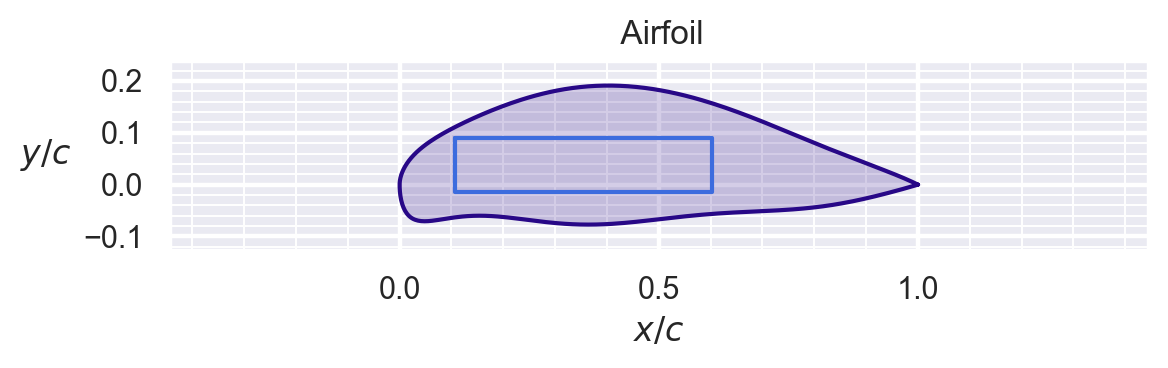

Step: 15, Action: [-2.9867642e-02  2.4348272e-01 -2.8982818e-01 -3.0128518e-01
  1.1474332e-01 -5.5970931e-01 -8.2740933e-02  2.2069389e-01
  3.0964041e-01 -1.7604692e-01  7.1585521e-02  7.5756270e-01
 -5.5748689e-01 -1.7653972e-01  2.4484824e-01 -1.5429407e-04
 -7.8319095e-02], Reward: 77.706242937272, Done: False, Info: {'step': 6, 'efficiency': 81.58214696777449, 'cl': 0.4493329758092981}
Obs: [ 0.31463724  0.27662992  0.5580047   0.4519419   0.57486606  0.47470757
  0.29312706  0.5270986  -0.53265625  0.1026336  -0.2527583  -0.43392152
  0.21111219 -0.42073426 -0.21056637 -0.3007421   0.3249932 ]


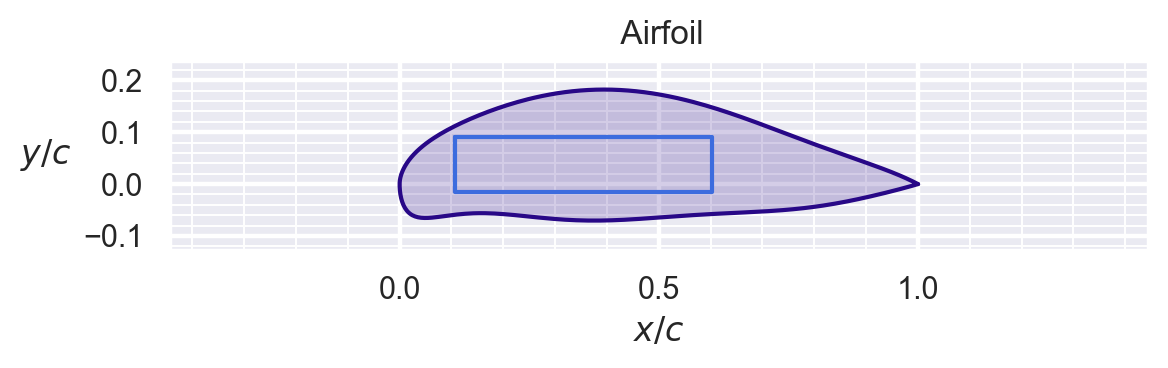

Step: 16, Action: [ 0.16795802 -0.24680129  0.37639445  0.04289288 -0.14130278  0.8859772
 -0.01488551  0.14115787 -0.2643598   0.16092448 -0.03449484 -0.7980625
  0.5031578   0.36422798 -0.07289837 -0.25599885  0.08826333], Reward: 73.71137681330836, Done: False, Info: {'step': 7, 'efficiency': 74.96239316296813, 'cl': 0.4290081104819018}
Obs: [ 0.33983094  0.23960972  0.61446387  0.45837584  0.55367064  0.60760415
  0.2908942   0.54827225 -0.57231027  0.12677227 -0.25793254 -0.5536309
  0.28658587 -0.36610004 -0.22150113 -0.3391419   0.3382327 ]


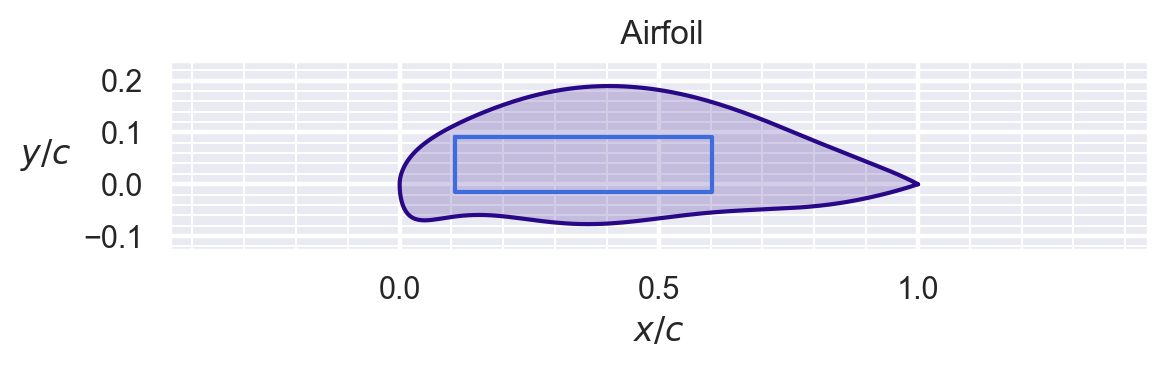

Step: 17, Action: [-0.05396632  0.29182988 -0.32194772 -0.19824502  0.21761774 -0.93878096
 -0.29829973 -0.08074259  0.18145955 -0.04109947  0.03054469  1.
 -0.84532505 -0.56705266  0.41289848  0.3242158  -0.32799464], Reward: 78.45514706529126, Done: False, Info: {'step': 8, 'efficiency': 82.00398492319323, 'cl': 0.4470323060144532}
Obs: [ 0.331736    0.2833842   0.5661717   0.42863908  0.5863133   0.466787
  0.24614926  0.5361609  -0.54509133  0.12060735 -0.25335082 -0.4036309
  0.1597871  -0.45115796 -0.15956636 -0.29050955  0.2890335 ]


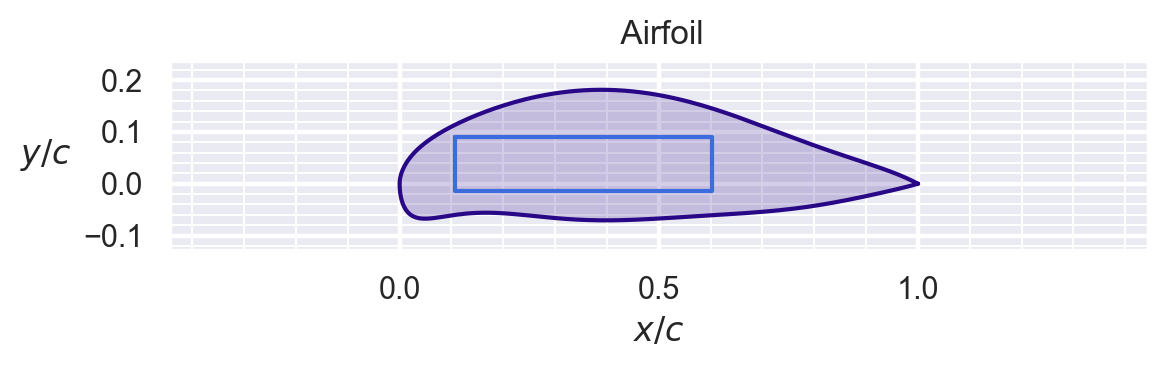

Step: 18, Action: [ 0.10318553 -0.31156155  0.37463307  0.11746009 -0.26776493  1.
  0.19108751  0.19807485 -0.13587715  0.02256472 -0.15113196 -0.93389124
  0.97696584  0.3909888  -0.32396555 -0.40050545  0.4789455 ], Reward: 73.38641767376978, Done: False, Info: {'step': 9, 'efficiency': 74.5775028916554, 'cl': 0.4283725384222642}
Obs: [ 0.3472138   0.23664996  0.62236667  0.4462581   0.54614854  0.616787
  0.2748124   0.56587213 -0.5654729   0.12399206 -0.27602062 -0.5437146
  0.306332   -0.39250964 -0.20816119 -0.35058537  0.36087534]


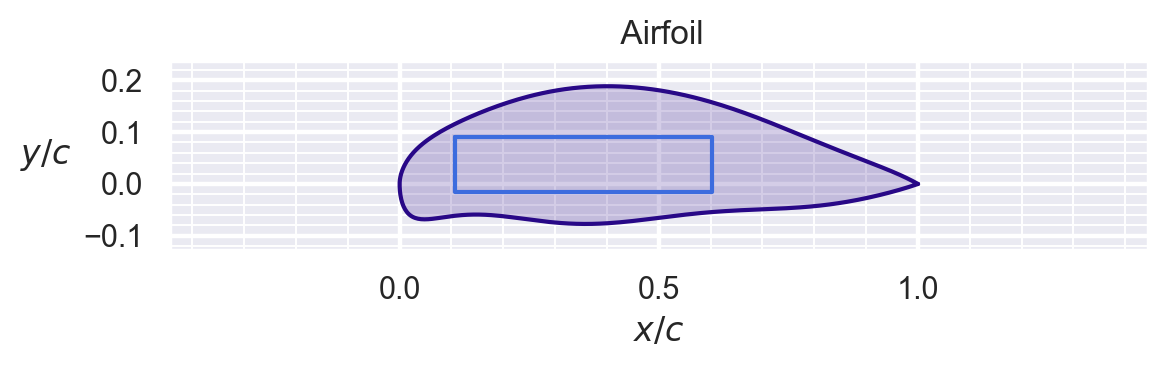

Step: 19, Action: [-0.03144164  0.21973819 -0.24995509 -0.19600192  0.22323373 -0.75022894
 -0.35029837 -0.1844872   0.11067169  0.10282567  0.12032039  1.
 -0.9105611  -0.40384376  0.48743165  0.439466   -0.6005452 ], Reward: 79.33973501271795, Done: True, Info: {'step': 10, 'efficiency': 83.75932582028346, 'cl': 0.4520617145311445}
Obs: [ 0.34249756  0.2696107   0.5848734   0.4168578   0.57963365  0.5042527
  0.22226763  0.538199   -0.5488721   0.1394159  -0.25797257 -0.39371458
  0.16974783 -0.4530862  -0.13504644 -0.28466547  0.27079353]


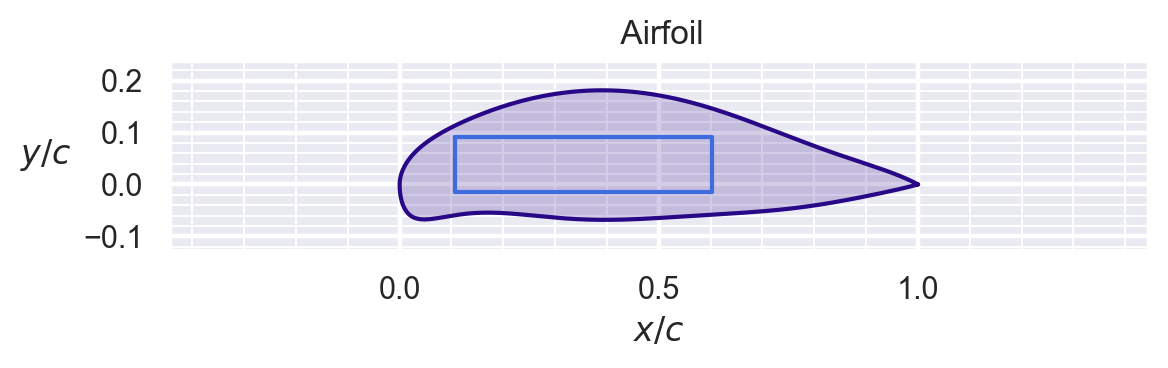

In [16]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, done, _, info = env.step(action)
    
    print(f"Step: {i}, Action: {action}, Reward: {reward}, Done: {done}, Info: {info}")
    print(f"Obs: {obs['airfoil']}")
    env.render()

    if done:
        obs, _ = env.reset()

